# Module 6: Pandas, Visualization
### NBA Tweets Exploration

In [1]:
#maybe add a description for the dataset linked above? 

#This module is quite long. we should add section headings so that students 
#can have the easiest time getting help on their questions and separating their learning 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

## Loading and Cleaning Data

In [3]:
locations = pd.read_csv("nbatweets/locations.csv")
locations.head()

,Unnamed: 0,lon,lat
0,1,121.171039,14.996784
1,2,-77.094709,38.984652
2,3,-3.703790,40.416775
3,8,-83.753428,9.748917
4,11,-77.066923,39.153163


In [4]:
tweets = pd.read_csv("nbatweets/TweetsNBA.csv", encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,listed_count,verified,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,utc_offset,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,1,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531741216989191,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,7,False,NaN,234888800,I am Ava :)) ?I LOVE #TWD #FTWD just a gal ???...,True,Thu Jan 06 20:41:19 +0000 2011,5860,285,12836,False,NaN,Ava,NaN,en,NaN,806,avakrutko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Ja comecou e eu no onibus https://t.co/wPgRLw...,0,0,False,False,1004531741422481409,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,pt,1,False,"Rio de Janeiro, Brasil",860068072983592964,+5521?2.0\r\n Flamenguista nao sou so mais um...,True,Thu May 04 09:46:22 +0000 2017,2200,113,1963,False,NaN,Markinho,NaN,pt,NaN,119,Marcoosloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/NBA/status/100447552030887...,https://t.co/wPgRLwdg1O
2,3,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0,0,False,False,1004531741954981888,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,0,False,"Naga City, Bicol Region",878451665258414080,NaN,False,Sat Jun 24 03:16:12 +0000 2017,578,380,736,False,http://Instagram.com/wrenzjudd,WR E N Z,NaN,en,NaN,319,wrenzberja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531743410573312,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,4,False,"Niterói, Brasil",3473700207,@Flamengo,False,Fri Aug 28 21:58:35 +0000 2015,67308,520,17161,False,NaN,GB,NaN,pt,NaN,171,duartegabriel35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0,0,False,False,1004531743272194048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,1,False,"Lawrence, MA",951834224646086656,22?,True,Fri Jan 12 15:12:18 +0000 2018,10357,805,4057,False,NaN,NG,NaN,en,NaN,326,NgDaizha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(tweets)

51425

In [6]:
tweets.columns

Index(['Unnamed: 0', 'text', 'retweet_count', 'favorite_count', 'favorited',
       'truncated', 'id_str', 'in_reply_to_screen_name', 'source', 'retweeted',
       'created_at', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'lang', 'listed_count', 'verified', 'location', 'user_id_str',
       'description', 'geo_enabled', 'user_created_at', 'statuses_count',
       'followers_count', 'favourites_count', 'protected', 'user_url', 'name',
       'time_zone', 'user_lang', 'utc_offset', 'friends_count', 'screen_name',
       'country_code', 'country', 'place_type', 'full_name', 'place_name',
       'place_id', 'place_lat', 'place_lon', 'lat', 'lon', 'expanded_url',
       'url'],
      dtype='object')

In [7]:
tweets.drop(axis=1, labels="text")

,Unnamed: 0,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,listed_count,verified,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,utc_offset,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,1,0,0,False,False,1004531741216989191,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,7,False,NaN,234888800,I am Ava :)) ?I LOVE #TWD #FTWD just a gal ???...,True,Thu Jan 06 20:41:19 +0000 2011,5860,285,12836,False,NaN,Ava,NaN,en,NaN,806,avakrutko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,False,False,1004531741422481409,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,pt,1,False,"Rio de Janeiro, Brasil",860068072983592964,+5521?2.0\r\n Flamenguista nao sou so mais um...,True,Thu May 04 09:46:22 +0000 2017,2200,113,1963,False,NaN,Markinho,NaN,pt,NaN,119,Marcoosloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/NBA/status/100447552030887...,https://t.co/wPgRLwdg1O
2,3,0,0,False,False,1004531741954981888,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,0,False,"Naga City, Bicol Region",878451665258414080,NaN,False,Sat Jun 24 03:16:12 +0000 2017,578,380,736,False,http://Instagram.com/wrenzjudd,WR E N Z,NaN,en,NaN,319,wrenzberja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,0,False,False,1004531743410573312,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,4,False,"Niterói, Brasil",3473700207,@Flamengo,False,Fri Aug 28 21:58:35 +0000 2015,67308,520,17161,False,NaN,GB,NaN,pt,NaN,171,duartegabriel35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,False,False,1004531743272194048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,1,False,"Lawrence, MA",951834224646086656,22?,True,Fri Jan 12 15:12:18 +0000 2018,10357,805,4057,False,NaN,NG,NaN,en,NaN,326,NgDaizha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51420,51421,0,0,False,False,1004543061630779392,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:58:24 +0000 2018,NaN,NaN,en,0,False,"Eugene, OR",817456401698131972,Bigger Duck than Puddles,False,Fri Jan 06 19:42:48 +0000 2017,1470,56,5582,False,NaN,Sco Ducks,NaN,en,NaN,920,quackerforlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51421,51422,0,0,False,False,1004543061672669185,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:58:24 +0000 2018,NaN,NaN,en,1,False,"Tianjin, People's Republic of China",246602837,Your love story is what you make it!,True,Thu Feb 03 02:55:20 +0000 2011,954,56,628,False,NaN,Marvin Dalit,NaN,en,NaN,196,marvdalit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51422,51423,0,0,False,False,1004543062087909376,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:58:24 +0000 2018,NaN,NaN,en,3,False,TamilNadu Indian,2908041535,NaN,True,Sun Nov 23 10:46:20 +0000 2014,6832,1880,48676,False,https://m.facebook.com/mani.mankatha.5,<U+014A><U+03F0> <U+039C>a<U+0438><U+03B9>,NaN,en,NaN,2852,NxMani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51423,51424,0,0,False,False,1004543061874135040,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:58:24 +0000 2018,NaN,NaN,und,5,False,"San Juan, Puerto Rico",2717261267,Ig: nicolemarie4 ?/ x,True,Sat Jul 19 00:12:49 +0000 2014,15558,288,2099,False,NaN,Nicko <ed><U+00A0><U+00BD><ed><U+00

In [8]:

#this line of code did not work - it said drop(columns = [list])
#changes to specify axis and labels instead of columns. make sure this is reflected in the textbook
tweets = tweets.drop(axis=1, labels=["Unnamed: 0", "utc_offset", "id_str", "url", "expanded_url", "user_id_str", "in_reply_to_screen_name", 
                             "in_reply_to_status_id_str", "in_reply_to_user_id_str"])

In [9]:
tweets.head()

,text,retweet_count,favorite_count,favorited,truncated,source,retweeted,created_at,lang,listed_count,verified,location,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon
0,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,en,7,False,NaN,I am Ava :)) ?I LOVE #TWD #FTWD just a gal ???...,True,Thu Jan 06 20:41:19 +0000 2011,5860,285,12836,False,NaN,Ava,NaN,en,806,avakrutko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ja comecou e eu no onibus https://t.co/wPgRLw...,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,pt,1,False,"Rio de Janeiro, Brasil",+5521?2.0\r\n Flamenguista nao sou so mais um...,True,Thu May 04 09:46:22 +0000 2017,2200,113,1963,False,NaN,Markinho,NaN,pt,119,Marcoosloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,en,0,False,"Naga City, Bicol Region",NaN,False,Sat Jun 24 03:16:12 +0000 2017,578,380,736,False,http://Instagram.com/wrenzjudd,WR E N Z,NaN,en,319,wrenzberja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,en,4,False,"Niterói, Brasil",@Flamengo,False,Fri Aug 28 21:58:35 +0000 2015,67308,520,17161,False,NaN,GB,NaN,pt,171,duartegabriel35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0,0,False,False,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,en,1,False,"Lawrence, MA",22?,True,Fri Jan 12 15:12:18 +0000 2018,10357,805,4057,False,NaN,NG,NaN,en,326,NgDaizha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Manipulation

In [10]:
tweets.head()

,text,retweet_count,favorite_count,favorited,truncated,source,retweeted,created_at,lang,listed_count,verified,location,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon
0,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,en,7,False,NaN,I am Ava :)) ?I LOVE #TWD #FTWD just a gal ???...,True,Thu Jan 06 20:41:19 +0000 2011,5860,285,12836,False,NaN,Ava,NaN,en,806,avakrutko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ja comecou e eu no onibus https://t.co/wPgRLw...,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,pt,1,False,"Rio de Janeiro, Brasil",+5521?2.0\r\n Flamenguista nao sou so mais um...,True,Thu May 04 09:46:22 +0000 2017,2200,113,1963,False,NaN,Markinho,NaN,pt,119,Marcoosloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,en,0,False,"Naga City, Bicol Region",NaN,False,Sat Jun 24 03:16:12 +0000 2017,578,380,736,False,http://Instagram.com/wrenzjudd,WR E N Z,NaN,en,319,wrenzberja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,en,4,False,"Niterói, Brasil",@Flamengo,False,Fri Aug 28 21:58:35 +0000 2015,67308,520,17161,False,NaN,GB,NaN,pt,171,duartegabriel35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0,0,False,False,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,en,1,False,"Lawrence, MA",22?,True,Fri Jan 12 15:12:18 +0000 2018,10357,805,4057,False,NaN,NG,NaN,en,326,NgDaizha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the shape of the dataframe allows us to get a better understanding of how many data points and how many variables we are dealing with.

In [11]:
tweets.shape

(51425, 35)

Recall from the textbook that we can access columns and rows in the dataframe through indexing! Let's try looking at the text of the 5th tweet of our dataframe.

In [12]:
tweets['text'].iloc[5]

##what do we want them to notice about this tweet? also the URL doesn't exist. 
#can we find another RT that has a working link? could be cool!

'RT @NBA: \r\n\r\n#NBAFinals \r\n#WhateverItTakes https://t.co/izrz82gkzm'

What do you notice about the tweet?

*Double click here to begin typing your answer*

When dealing with large datasets, it's more helpful to get a big picture idea so we know what data we are dealing with. We can do this through a series of visualizations and summary statistics.

In [13]:
max(tweets['retweet_count'])

0

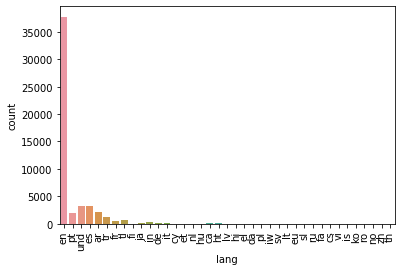

In [14]:
sns.countplot(x='lang', data=tweets)
plt.xticks(rotation=90);

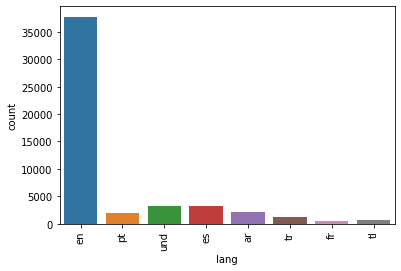

In [15]:
# add description about why the visual generated above is not good because we can not compare the other languages as well with this scale/ focusing on such large disparities
sns.countplot(x='lang', data=tweets[tweets['lang'].isin(['en', 'pt', 'und', 'es', 'ar', 'tr', 'fr', 'tl'])])
plt.xticks(rotation=90);

In [16]:
# length of each tweet
tweets['length'] = tweets['text'].str.len()

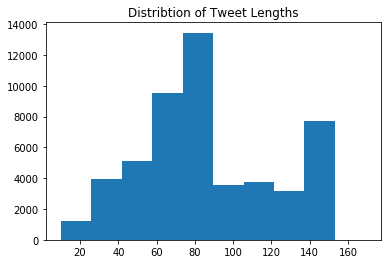

In [17]:
plt.hist(tweets['length'])
plt.title('Distribtion of Tweet Lengths');

#maybe either add a desciption or a question for them to describe this histogram. what can they say about tweet length after looking at this histogram?

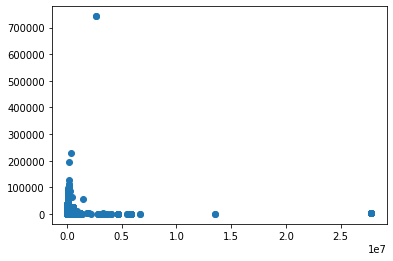

In [18]:
plt.scatter(tweets['followers_count'], tweets['friends_count'])
#for their sake, we should label this 
#or challenge them to label this

In the next section we focus on eliminating NA data - add description / section heading here


In [19]:
# dealing with null data
tweets['location']

0                                        NaN
1                     Rio de Janeiro, Brasil
2                    Naga City, Bicol Region
3                            Niterói, Brasil
4                               Lawrence, MA
                        ...                 
51420                             Eugene, OR
51421    Tianjin, People's Republic of China
51422                      TamilNadu Indian 
51423                  San Juan, Puerto Rico
51424                 Santa Catarina, Brasil
Name: location, Length: 51425, dtype: object

In [20]:
np.count_nonzero(tweets['location'].isna())

14487

In [21]:
tweets['location'] = tweets['location'].fillna('No Location')

In [22]:
tweets['location']

0                                No Location
1                     Rio de Janeiro, Brasil
2                    Naga City, Bicol Region
3                            Niterói, Brasil
4                               Lawrence, MA
                        ...                 
51420                             Eugene, OR
51421    Tianjin, People's Republic of China
51422                      TamilNadu Indian 
51423                  San Juan, Puerto Rico
51424                 Santa Catarina, Brasil
Name: location, Length: 51425, dtype: object

## Group By and Aggregations 

We use "groupby" and "aggregate" to group and represent data based on a certain field value. Imagine if you had a dataset with each entry being a person in your class and the color they like. If you wanted to answer the question regarding how many people like the color pink, you would have to group by the color and aggregate the number of people. 

#should we define the term aggregate with other math words they may know? is this done in the textbook?

Similarly, in regards to the the nba tweets dataset, let's say we want to look at how many people tweeted in a certain language. First step would be to group by tweet. 

In [23]:
grouped_by_lang = tweets[["text", "lang"]].groupby("lang")

In [24]:
grouped_by_lang

As you can see above, grouped_by_lang does not look like a dataframe yet - it is actually a groupby object until we apply an aggregation method like sum, count, average or similar on the group by object. Because in this case we are only looking at how many people tweeted, we can use a simple count function as our aggregator.

In [25]:
count_by_lang = grouped_by_lang.agg(np.count_nonzero).sort_values("text", ascending=False).head()
count_by_lang

,text
lang,
en,37756
und,3237
es,3164
ar,2129
pt,1901


Notice that the entries in the lang field are bolded, and when you try to access the column, it returns a key error as below.

In [26]:
count_by_lang["lang"]

KeyError: 'lang'

This is because use a groupby on a certain field, make it the index in the resulting dataframe. So if you would like to acccess the lang field, we must reset the index. 

In [27]:
count_by_lang_reset_index = count_by_lang.reset_index()
count_by_lang_reset_index

,lang,text
0,en,37756
1,und,3237
2,es,3164
3,ar,2129
4,pt,1901


Now we can access the lang field. 

In [28]:
list(count_by_lang_reset_index["lang"])

['en', 'und', 'es', 'ar', 'pt']

As we can see, as we can expect english is the most common language among all the tweets. 

How about trying to find out the number of tweets per country in the dataset? Replace the values wherever you see an "..."

In [ ]:
grouped_by_country_code = tweets["...."].groupby("....")
count_by_country_code = grouped_by_country_code.agg("...")
count_by_country_code.head()

Sort the values in count_by_country_code and find out the top 5 countries that tweet about the NBA. Assign the answer variable below, to a list of these countries. 

In [ ]:
answer_max_country_engagement = [...]
answer_max_country_engagement

For the next exercise remember, the way to aggregate by a certain function, is to provide that function as an argument to the .agg method. 

Common functions used are sum, np.count_nonzero (count), np.mean (average), and np.std (standard deviation). The example below groups by country code and returns the average number of listed count for each country. Fill in the "..." below. 

In [29]:
grouped_by_country_code = tweets[["country_code", "listed_count"]].groupby("country_code")
grouped_by_country_code.agg(np.mean).sort_values("listed_count", ascending=False).head()

,listed_count
country_code,
IN,78.000
KW,75.625
JM,62.000
ES,57.300
CM,54.800
